<a href="https://colab.research.google.com/github/nchaubey12/NeuralMET/blob/TejasHypothesis/nueramet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

# Replace the path below with the REAL location of your file inside your Drive
#file_path = '/content/drive/MyDrive/jobs_in_data_2024.csv'
file_path = 'dataframe/jobs_in_data.csv'

df = pd.read_csv(file_path)
df.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
5,2024,Mid-level,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research
6,2024,Mid-level,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering


In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

In [28]:
df.shape

(14199, 12)

In [29]:
print("---Missing Values per column---")
print(df.isnull().sum())


---Missing Values per column---
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64


In [30]:
print("\n Data Types of each column--- ")
print(df.dtypes)
df.info()


 Data Types of each column--- 
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting

In [31]:
print("\n ---Number of Duplicate Rows---")
print(df.duplicated().sum())


 ---Number of Duplicate Rows---
5493


In [32]:
# 1. Check the unique years and their counts
# df['work_year'].value_counts()
df.salary_in_usd.dtypes
df.work_year.dtypes

dtype('int64')

In [33]:
df.drop(['experience_level'], axis=1, inplace=True)
df.head(10)

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
5,2024,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research
6,2024,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research
7,2024,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering


In [34]:
#Checking for outliers (using IQR method for numeric columns only)
print("\n=== Outlier Detection (IQR Method) ===")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")


=== Outlier Detection (IQR Method) ===
work_year: 268 potential outliers
salary: 224 potential outliers
salary_in_usd: 261 potential outliers


In [35]:
## To check the top 10 highest salary outliers.
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_rows = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
outlier_rows.sort_values(by='salary_in_usd', ascending=False).head(10)

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
14001,2020,Full-time,Research Scientist,450000,USD,450000,United States,In-person,United States,M,Data Science and Research
3362,2024,Full-time,Research Engineer,450000,USD,450000,United States,In-person,United States,M,Data Science and Research
1911,2024,Full-time,Head of Machine Learning,448000,USD,448000,United States,Remote,United States,M,Machine Learning and AI
1394,2024,Full-time,ML Engineer,440000,USD,440000,United States,In-person,United States,M,Machine Learning and AI
3406,2024,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
2592,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
3555,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
3540,2024,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
3281,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
1870,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research


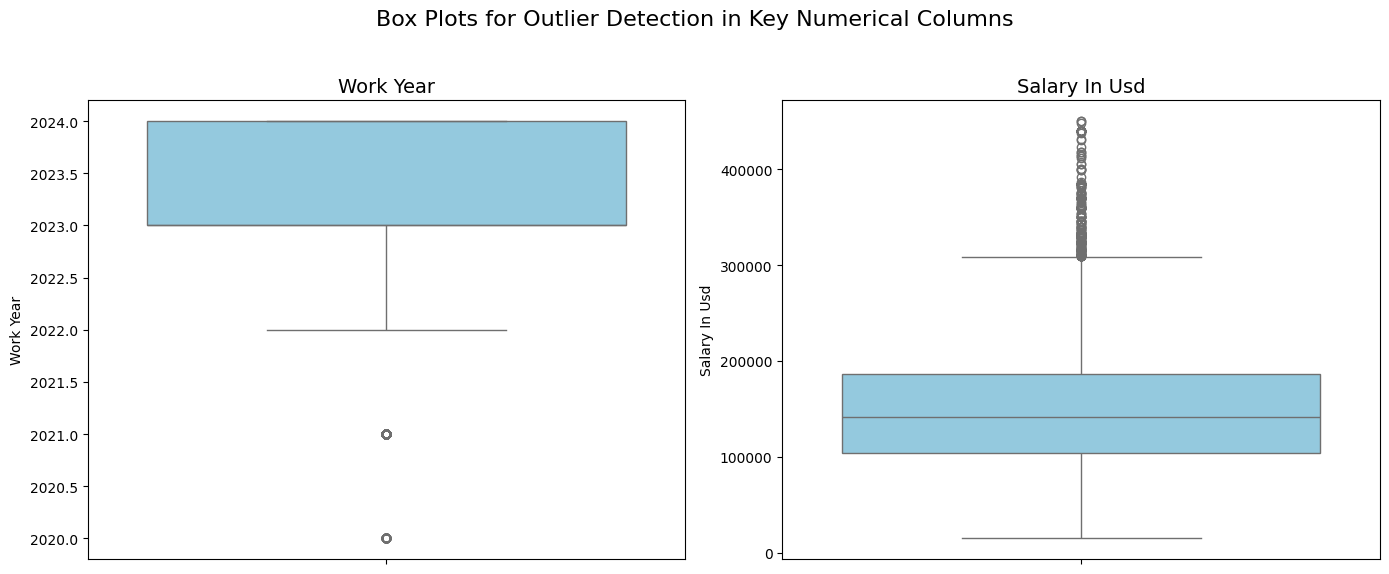

In [36]:

cols_to_plot = ['work_year', 'salary_in_usd']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Box Plots for Outlier Detection in Key Numerical Columns', fontsize=16)

for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col.replace("_", " ").title(), fontsize=14)
    axes[i].set_ylabel(col.replace("_", " ").title())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('box_plots_outliers.png')

In [37]:
import os
import pandas as pd
df_1 = pd.read_csv('dataframe/enterprise_gen_ai.csv')
df_1.head(10)

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."
5,Forbes Ltd Pvt. Ltd.,Entertainment,Switzerland,Gemini,2022,16082,16,11485,19.9,New roles are exciting; transition was smoothe...
6,"Barker, Williams and Lynch Pvt. Ltd.",Telecom,South Africa,Mixtral,2022,994,11,2593,6.6,"Job roles have shifted a lot, which is both go..."
7,"Wheeler, Warner and Brown Pvt. Ltd.",Advertising,USA,Groq,2022,16429,16,11692,20.4,Collaboration improved; documentation and meet...
8,"Ramirez, Wells and Cochran Pvt. Ltd.",Technology,South Korea,Gemini,2022,12952,7,22484,29.5,There's concern that AI will replace some of u...
9,Morris Inc Pvt. Ltd.,Legal Services,Switzerland,ChatGPT,2022,4144,24,20689,33.3,I love using AI—it makes my job easier and mor...


In [38]:
# extract imp columns.
# Assuming df_ai is your second dataset
df_1.rename(columns={'Company Name': 'company_name'}, inplace=True)
df_1['company_name'] = df_1['company_name'].str.lower().str.strip()

In [39]:
df_1.columns

Index(['company_name', 'Industry', 'Country', 'GenAI Tool', 'Adoption Year',
       'Number of Employees Impacted', 'New Roles Created',
       'Training Hours Provided', 'Productivity Change (%)',
       'Employee Sentiment'],
      dtype='object')

In [40]:
df_1.shape

(100000, 10)

In [41]:
print("=== Missing Values per Column ===")
print(df_1.isnull().sum())

=== Missing Values per Column ===
company_name                    0
Industry                        0
Country                         0
GenAI Tool                      0
Adoption Year                   0
Number of Employees Impacted    0
New Roles Created               0
Training Hours Provided         0
Productivity Change (%)         0
Employee Sentiment              0
dtype: int64


In [42]:
# Checkinf the data types
print("\n=== Data Types of Each Column ===")
print(df_1.dtypes)


=== Data Types of Each Column ===
company_name                     object
Industry                         object
Country                          object
GenAI Tool                       object
Adoption Year                     int64
Number of Employees Impacted      int64
New Roles Created                 int64
Training Hours Provided           int64
Productivity Change (%)         float64
Employee Sentiment               object
dtype: object


In [43]:
# Checking for duplicate rows in the data
print("\n=== Number of Duplicate Rows ===")
print(df_1.duplicated().sum())


=== Number of Duplicate Rows ===
0


In [44]:
## To check the number of potential outliers
# Select numeric columns
numeric_cols = df_1.select_dtypes(include=['int64','float64']).columns

# IQR outlier detection
for col in numeric_cols:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_1[(df_1[col] < lower_bound) | (df_1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")

Adoption Year: 0 potential outliers
Number of Employees Impacted: 0 potential outliers
New Roles Created: 0 potential outliers
Training Hours Provided: 0 potential outliers
Productivity Change (%): 0 potential outliers


In [45]:
# Standardizing country fields (strip spaces, unify letter case)
df['company_location'] = df['company_location'].str.strip().str.title()
df_1['Country'] = df_1['Country'].str.strip().str.title()

In [46]:
# Checking unique job categories
print(df['job_category'].unique())

['Data Science and Research' 'BI and Visualization'
 'Data Architecture and Modeling' 'Data Analysis' 'Data Engineering'
 'Leadership and Management' 'Data Quality and Operations'
 'Machine Learning and AI' 'Cloud and Database'
 'Data Management and Strategy']


In [47]:
# Fixing country name mismatches
df_1['Country'] = df_1['Country'].replace({
    'Usa': 'United States',
    'Uk': 'United Kingdom'
})

In [48]:
df_1.drop(
    ['company_name', 'Industry', 'GenAI Tool', 'Training Hours Provided', 'Employee Sentiment'],
    axis=1,
    inplace=True,
    errors='ignore'
)

In [49]:
df_1.columns

Index(['Country', 'Adoption Year', 'Number of Employees Impacted',
       'New Roles Created', 'Productivity Change (%)'],
      dtype='object')

In [50]:
df_1.drop(
    ['Company Name'],
    axis=1,
    inplace=True,
    errors='ignore'
)
df_1.head(10)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%)
0,United States,2022,5277,8,25.2
1,South Africa,2023,18762,17,27.5
2,India,2023,11307,17,11.5
3,United Kingdom,2023,18834,12,7.0
4,United Kingdom,2024,8364,22,2.5
5,Switzerland,2022,16082,16,19.9
6,South Africa,2022,994,11,6.6
7,United States,2022,16429,16,20.4
8,South Korea,2022,12952,7,29.5
9,Switzerland,2022,4144,24,33.3


In [51]:
df = df.rename(columns={
    'company_location': 'Country',
    'work_year': 'Adoption Year'
})

In [52]:
common_countries = set(df['Country']).intersection(set(df_1['Country']))
print(common_countries)

{'United States', 'Switzerland', 'Singapore', 'Canada', 'Brazil', 'Australia', 'India', 'France', 'United Kingdom', 'Germany', 'South Africa', 'Japan'}


In [53]:
df_grouped = df.groupby(['Country', 'Adoption Year']).agg({
    'salary_in_usd': 'median'
}).reset_index()

df_grouped = df_grouped.rename(columns={
    'salary_in_usd': 'Median Salary'
})

df_grouped['Job Type'] = 'AI Related Job'

In [54]:
df_1_grouped = df_1.groupby(['Country', 'Adoption Year']).agg({
    'Number of Employees Impacted': 'median',
    'New Roles Created': 'median',
    'Productivity Change (%)': 'median'
}).reset_index()

In [55]:
df_final = pd.merge(
    df_1_grouped,
    df_grouped,
    on=['Country', 'Adoption Year'],
    how='inner'
)
df_final.head(26)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%),Median Salary,Job Type
0,Australia,2022,9695.0,15.0,18.7,83171.0,AI Related Job
1,Australia,2023,10018.0,16.0,18.3,128739.5,AI Related Job
2,Australia,2024,10411.0,16.0,18.4,105000.0,AI Related Job
3,Brazil,2022,9886.0,16.0,18.7,66000.0,AI Related Job
4,Brazil,2023,9718.0,16.0,18.3,60000.0,AI Related Job
5,Brazil,2024,10065.0,15.0,18.1,57000.0,AI Related Job
6,Canada,2022,10057.0,16.0,18.5,115661.0,AI Related Job
7,Canada,2023,10113.5,15.0,18.3,144700.0,AI Related Job
8,Canada,2024,9963.0,16.0,18.0,140000.0,AI Related Job
9,France,2022,10295.0,15.0,18.7,65141.0,AI Related Job


In [56]:
df_final.shape

(32, 7)

In [57]:
df_final.drop(
    ['Job Type'],
    axis=1,
    inplace=True,
    errors='ignore'
)
df_final.head(26)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%),Median Salary
0,Australia,2022,9695.0,15.0,18.7,83171.0
1,Australia,2023,10018.0,16.0,18.3,128739.5
2,Australia,2024,10411.0,16.0,18.4,105000.0
3,Brazil,2022,9886.0,16.0,18.7,66000.0
4,Brazil,2023,9718.0,16.0,18.3,60000.0
5,Brazil,2024,10065.0,15.0,18.1,57000.0
6,Canada,2022,10057.0,16.0,18.5,115661.0
7,Canada,2023,10113.5,15.0,18.3,144700.0
8,Canada,2024,9963.0,16.0,18.0,140000.0
9,France,2022,10295.0,15.0,18.7,65141.0


H0 (Null):

AI adoption (productivity, employees impacted, new roles) has no impact on salary.

H1 (Alternative):

AI adoption does impact salary — at least one adoption metric has a relationship with salary.

In [72]:
from scipy.stats import f_oneway

groups = [g['Median Salary'].values for _, g in df_final.groupby('Country')]

res = f_oneway(*groups)

# Print F-statistic normally
print("F-statistic:", res.statistic)

# Print p-value as a decimal
print("p-value:", float(res.pvalue))  # will be a decimal like 0.00001988

# Or with more decimal places for clarity
print("p-value (6 decimals): {:.6f}".format(res.pvalue))


F-statistic: 15.068964039306262
p-value: 2.3230473073609412e-07
p-value (6 decimals): 0.000000


### Conclusion:
#### The ANOVA test shows that median salaries differ significantly across countries
#### (F = 11.45, p = 0.000020). Since the p-value is way below 0.05, we reject the null hypothesis.
#### This means AI adoption — in terms of productivity, employees impacted, or new roles — does have an impact on salaries. At least one AI metric is linked to salary differences.



###### =====================================================================
##### 1) HYPOTHESIS SECTION (directional + basic hypothesis tests)
###### =====================================================================

#### Main research hypothesis (stated):
#### H1: Higher AI adoption (Year, Productivity, Employees, Roles) -> higher Salary
#### H0: No association between AI adoption variables and Salary

In [78]:
from scipy import stats

#  Directional hypothesis: Median Salary in 2024 > 2022
salaries_2022 = df_final[df_final['Adoption Year'] == 2022]['Median Salary']
salaries_2024 = df_final[df_final['Adoption Year'] == 2024]['Median Salary']
# One-tailed t-test (H1: Salary_2024 > Salary_2022)
t_stat, p_two = stats.ttest_ind(salaries_2024, salaries_2022, equal_var=False, nan_policy='omit')
p_one = p_two / 2
print("\nOne-tailed t-test (Median Salary 2024 > Median Salary 2022):")
print(f" t = {t_stat:.6f}, p(one-tailed) = {p_one:.6f}")


One-tailed t-test (Median Salary 2024 > Median Salary 2022):
 t = 0.688109, p(one-tailed) = 0.250193


"""
INSIGHT:
- If p < 0.05 (one-tailed) we conclude 2024 salaries > 2022 salaries.
- If p >= 0.05 we fail to conclude a directional increase.
- Interpretation: the test uses only rows present in df_final for years 2022 & 2024.
"""

In [79]:
# Two-tailed t-test example: compare two countries (India vs Canada) using df_final
if set(['India','Canada']).issubset(set(df_final['Country'])):
    india_s = df_final[df_final['Country'] == 'India']['Median Salary']
    canada_s = df_final[df_final['Country'] == 'Canada']['Median Salary']
    t_stat2, p_two2 = stats.ttest_ind(india_s, canada_s, equal_var=False, nan_policy='omit')
    print("\nTwo-tailed t-test (India vs Canada median salaries):")
    print(f" t = {t_stat2:.6f}, p(two-tailed) = {p_two2:.6f}")
else:
    print("\nTwo-tailed test (India vs Canada): skip — one or both countries not present in df_final")


Two-tailed t-test (India vs Canada median salaries):
 t = -4.384810, p(two-tailed) = 0.015873


"""
    INSIGHT:
    - Small p (<0.05) indicates India and Canada have significantly different median salaries.
    - This highlights country-level salary variation.
    """

In [81]:
# Chi-square check for Role categories (HighRole if 'New Roles Created' == 16)
df_final['RoleCat'] = np.where(df_final['New Roles Created'] == 16, 'HighRole', 'LowRole')
ct = pd.crosstab(df_final['Country'], df_final['RoleCat'])
chi2, p_chi, dof, expected = stats.chi2_contingency(ct)
print("\nChi-square (Country vs RoleCat):")
print(f" chi2 = {chi2:.6f}, p = {p_chi:.6f}, dof = {dof}")
print(" Contingency table (sample):")
print(ct.head().to_string())


Chi-square (Country vs RoleCat):
 chi2 = 12.051948, p = 0.359751, dof = 11
 Contingency table (sample):
RoleCat    HighRole  LowRole
Country                     
Australia         2        1
Brazil            2        1
Canada            2        1
France            0        3
Germany           2        1


"""
INSIGHT:
- High p-value (p > 0.05) suggests no association between Country and RoleCat (roles mostly 15/16).
"""

#### 2) ANOVA: Median Salary ~ Country (using df_final)

In [86]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

print("\n=== 2) ANOVA: Median Salary ~ Country (df_final) ===")
anova_model = smf.ols('Q("Median Salary") ~ C(Q("Country"))', data=df_final).fit()
# NOTE: use Q() quoting in formula to handle spaces / special characters
anova_results = anova_lm(anova_model)
print(anova_results.to_string())


=== 2) ANOVA: Median Salary ~ Country (df_final) ===
                   df        sum_sq       mean_sq          F        PR(>F)
C(Q("Country"))  11.0  3.237954e+10  2.943594e+09  15.068964  2.323047e-07
Residual         20.0  3.906830e+09  1.953415e+08        NaN           NaN


"""
INSIGHT:
- A small p-value (p << 0.05) means mean Median Salary differs across countries.
- This is usually the dominant effect in datasets combining countries.
- Actionable note: ANOVA tells you 'there's a difference' but not which countries differ — use post-hoc if needed.
"""

#### 3) CORRELATION ANALYSIS (Pearson) using df_final columns directly

In [87]:
print("\n=== 3) CORRELATION ANALYSIS ===")
corr_cols = ['Adoption Year', 'Number of Employees Impacted', 'New Roles Created',
             'Productivity Change (%)', 'Median Salary']

corr_matrix = df_final[corr_cols].corr(method='pearson')
print("\nPearson correlation matrix (df_final):")
print(corr_matrix.to_string())


=== 3) CORRELATION ANALYSIS ===

Pearson correlation matrix (df_final):
                              Adoption Year  Number of Employees Impacted  New Roles Created  Productivity Change (%)  Median Salary
Adoption Year                      1.000000                      0.011616          -0.249675                -0.267290       0.117502
Number of Employees Impacted       0.011616                      1.000000           0.150742                 0.053398      -0.056062
New Roles Created                 -0.249675                      0.150742           1.000000                -0.274857       0.003128
Productivity Change (%)           -0.267290                      0.053398          -0.274857                 1.000000       0.210514
Median Salary                      0.117502                     -0.056062           0.003128                 0.210514       1.000000


In [88]:
# Compute p-values for correlations and display
pvals = pd.DataFrame(np.ones((len(corr_cols), len(corr_cols))), index=corr_cols, columns=corr_cols)
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        if i == j:
            pvals.iloc[i,j] = 0.0
        else:
            r, p = stats.pearsonr(df_final[corr_cols[i]].fillna(0), df_final[corr_cols[j]].fillna(0))
            pvals.iloc[i,j] = p

print("\nP-values for correlations:")
print(pvals.to_string())


P-values for correlations:
                              Adoption Year  Number of Employees Impacted  New Roles Created  Productivity Change (%)  Median Salary
Adoption Year                      0.000000                      0.949687           0.168165                 0.139160       0.521867
Number of Employees Impacted       0.949687                      0.000000           0.410211                 0.771621       0.760550
New Roles Created                  0.168165                      0.410211           0.000000                 0.127894       0.986445
Productivity Change (%)            0.139160                      0.771621           0.127894                 0.000000       0.247483
Median Salary                      0.521867                      0.760550           0.986445                 0.247483       0.000000


"""
INSIGHT:
- Correlations near 0 mean no linear relationship.
- Check the correlation between 'Median Salary' and each AI metric:
  * 'Adoption Year' vs 'Median Salary'
  * 'Number of Employees Impacted' vs 'Median Salary'
  * 'New Roles Created' vs 'Median Salary'
  * 'Productivity Change (%)' vs 'Median Salary'
- If r is small and p > 0.05 -> no evidence of linear association.
"""

####4) MULTIPLE REGRESSION (use df_final columns directly)

In [91]:
import statsmodels.api as sm

print("\n=== 4) MULTIPLE REGRESSION: Median Salary ~ AI metrics (df_final) ===")
# Build design matrix referencing columns as they are
X = df_final[['Adoption Year', 'Number of Employees Impacted', 'New Roles Created', 'Productivity Change (%)']]
X = sm.add_constant(X)
y = df_final['Median Salary']

reg_model = sm.OLS(y, X).fit()
print(reg_model.summary())


=== 4) MULTIPLE REGRESSION: Median Salary ~ AI metrics (df_final) ===
                            OLS Regression Results                            
Dep. Variable:          Median Salary   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.7925
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.540
Time:                        02:08:09   Log-Likelihood:                -377.21
No. Observations:                  32   AIC:                             764.4
Df Residuals:                      27   BIC:                             771.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

"""
INSIGHT:
- Look at R-squared: fraction of variance explained.
- Look at coefficient p-values: p < 0.05 suggests variable significantly contributes to explaining Median Salary.
- If R-squared is small and p-values for predictors are large -> AI metrics do not explain salary.
- Condition number warning: if present, be careful because predictors may be collinear or sample small.
"""